In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#执行第一步，连接谷歌云盘

Mounted at /content/drive


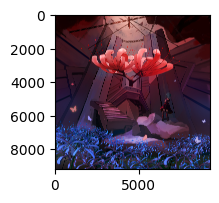

In [3]:
I = mpimg.imread('/content/drive/MyDrive/python 研究/6彼岸开绽2 .jpg')
plt.figure(figsize=(2,2))
plt.imshow(I)
#检查是否连上了谷歌云

In [120]:
df = pd.read_csv('/content/drive/MyDrive/连接关系和点权重/扬州边属性.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/连接关系和点权重/扬州点属性.csv')

# 导入并且获得图的基本信息

In [121]:
df_2

,节点名称,区域属性,线路,500M内文保单位/古迹遗址/宗祠故地的个数
0,亚联公交停车场,NaN,1路,0.0
1,亚联批发市场,NaN,1路,0.0
2,汤汪医院,NaN,1路,0.0
3,汤汪花园,NaN,1路,0.0
4,连运小区南,NaN,1路,0.0
...,...,...,...,...
912,珍园(小秦淮河),NaN,小秦淮河,6.0
913,朱氏园(小秦淮河),NaN,小秦淮河,7.0
914,钞关(小秦淮河),NaN,小秦淮河,4.0
915,渡江桥(古运河),NaN,古运河水系,9.0


In [122]:
# 过滤空节点
df = df.dropna(subset=["前一节点", "后一节点"])
G = nx.from_pandas_edgelist(df,"前一节点","后一节点", edge_attr=True, create_using=nx.MultiGraph())  #edge_attr=True,边的属性信息也要导入

In [123]:
# 读取CSV文件
df_links = df
df_attributes = df_2

# 创建一个空的多重图
G = nx.MultiGraph()

# 添加节点和边到多重图
for _, row in df_links.iterrows():
    node1 = row['前一节点']
    node2 = row['后一节点']
    edge_attr = row['线路名称']
    if pd.notna(node1) and pd.notna(node2):
        G.add_edge(node1, node2, attribute=edge_attr)


# 添加节点属性到多重图
for _, row in df_attributes.iterrows():
    node = row['节点名称']
    attr1 = row['区域属性']
    attr2 = row['线路']
    attr3 = row['500M内文保单位/古迹遗址/宗祠故地的个数']

    if pd.notna(node):
        G.add_node(node)
        G.nodes[node]['区域属性'] = attr1
        G.nodes[node]['线路'] = attr2
        G.nodes[node]['500M内文保单位/古迹遗址/宗祠故地的个数'] = attr3

**检查节点属性**

In [124]:
#查看节点的属性
for node, attrs in G.nodes.data():
    print("Node:", node)
    print("Attributes:", attrs)
    print()

Node: 亚联公交停车场
Attributes: {'区域属性': nan, '线路': '23路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 亚联批发市场
Attributes: {'区域属性': nan, '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 汤汪医院
Attributes: {'区域属性': nan, '线路': '5路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 汤汪花园
Attributes: {'区域属性': nan, '线路': '6路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 连运小区南
Attributes: {'区域属性': nan, '线路': '6路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 连运路渡江南路
Attributes: {'区域属性': nan, '线路': '6路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 渡江南路连运西路
Attributes: {'区域属性': nan, '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 连运小区西门
Attributes: {'区域属性': nan, '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 奥邦公园
Attributes: {'区域属性': nan, '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 七里河公园
Attributes: {'区域属性': nan, '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 渡江南路江阳东路
Attributes: {'区域属性': nan, '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 福运门
Attributes: {'区域属性': nan, '线路': '8路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 渡江

**查看边属性**

In [125]:
for u, v, attr in G.edges(data=True):
    print(f"边 ({u}, {v}) 的属性:")
    for key, value in attr.items():
        print(f"{key}: {value}")
    print()

边 (亚联公交停车场, 亚联批发市场) 的属性:
attribute: 1路

边 (亚联公交停车场, 九久奥莱广场) 的属性:
attribute: 23路

边 (亚联批发市场, 汤汪医院) 的属性:
attribute: 1路

边 (汤汪医院, 汤汪花园) 的属性:
attribute: 1路

边 (汤汪医院, 汤汪花园) 的属性:
attribute: 5路

边 (汤汪医院, 正泰花苑) 的属性:
attribute: 5路

边 (汤汪花园, 连运小区南) 的属性:
attribute: 1路

边 (汤汪花园, 连运小区南) 的属性:
attribute: 5路

边 (汤汪花园, 连运小区南) 的属性:
attribute: 6路

边 (汤汪花园, 联谊路加气站) 的属性:
attribute: 6路

边 (连运小区南, 连运路渡江南路) 的属性:
attribute: 1路

边 (连运小区南, 连运路渡江南路) 的属性:
attribute: 5路

边 (连运小区南, 连运路渡江南路) 的属性:
attribute: 6路

边 (连运路渡江南路, 渡江南路连运西路) 的属性:
attribute: 1路

边 (连运路渡江南路, 连运西路) 的属性:
attribute: 5路

边 (连运路渡江南路, 食品产业园公交首末站) 的属性:
attribute: 6路

边 (渡江南路连运西路, 连运小区西门) 的属性:
attribute: 1路

边 (连运小区西门, 奥邦公园) 的属性:
attribute: 1路

边 (奥邦公园, 七里河公园) 的属性:
attribute: 1路

边 (七里河公园, 渡江南路江阳东路) 的属性:
attribute: 1路

边 (渡江南路江阳东路, 福运门) 的属性:
attribute: 1路

边 (福运门, 渡江桥) 的属性:
attribute: 1路

边 (福运门, 工人新村) 的属性:
attribute: 8路

边 (福运门, 渡江桥东) 的属性:
attribute: 8路

边 (渡江桥, 育才小学) 的属性:
attribute: 1路

边 (渡江桥, 育才小学) 的属性:
attribute: 6路

边 (渡江桥, 育才小学) 的属性:
attribute: 

**获取节点数量**

In [126]:
# 获取图G的节点数量
num_nodes = G.number_of_nodes()

print("图G的节点数量为:", num_nodes)

图G的节点数量为: 574


# 获取邻接矩阵的方式

In [127]:
# 获取邻接矩阵
adj_matrix = nx.adjacency_matrix(G)
# 将邻接矩阵转换为NumPy数组
adj_array = adj_matrix.toarray()

In [128]:
#打印邻接矩阵
print(adj_array)

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [129]:
#获取节点编号列表
node_ids = list(G.nodes())

# 构建邻接矩阵
adj_matrix = nx.adjacency_matrix(G, nodelist=node_ids)

# 将邻接矩阵转换为DataFrame
df1 = pd.DataFrame(adj_matrix.toarray(), index=node_ids, columns=node_ids)

# 保存DataFrame到CSV文件
#df1.to_csv('/content/drive/MyDrive/python 研究/XXXXX', index=True, header=True)


In [130]:
len(list(G.nodes()))

574

In [131]:
list(G.nodes())[174]

'麦德龙'

# 获取权重的方法

In [132]:
node_attributes = G.nodes.data()
target_attribute = '500M内文保单位/古迹遗址/宗祠故地的个数'
attribute=[]

In [133]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_attribute in attributes:
        attribute_value = attributes[target_attribute]

        attribute.append(attribute_value)
    else:
        attribute.append(-1)

    print("节点:", node)
    print("属性:", target_attribute, "=", attribute_value)
    print()

节点: 亚联公交停车场
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 亚联批发市场
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 汤汪医院
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 汤汪花园
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 连运小区南
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 连运路渡江南路
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 渡江南路连运西路
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 连运小区西门
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 奥邦公园
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 七里河公园
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 渡江南路江阳东路
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 福运门
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 渡江桥
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 10.0

节点: 育才小学
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 4.0

节点: 苏北医院
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 4.0

节点: 仙鹤寺
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 7.0

节点: 石塔寺
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 大学北路北
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 双桥
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 石桥
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 扬州友好医院
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 锦绣花园
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 紫薇苑
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0

In [134]:
#获取权重
attribute=np.array(attribute)
attribute.shape

(574,)

In [135]:
#打印权重
print(attribute)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  4.  4.  7.  3.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  4.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  0.  3.  6.  4.
  8.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  9.  5.  5.  5.  6.  5.  1.  0.  2.  2.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  7.  6. 13.  9.
  9.  9.  9. 11. 11.  7.  4.  1.  1.  0.  0.  0.  3.  3.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

# 将图的边转换为edge_index

In [136]:
 #获取图的边列表
edge_list = list(G.edges())

# 将边列表转换为 edge_index
edge_index = np.array(edge_list).T

# 打印结果
edge_index= np.array(edge_index)
edge_index

array([['亚联公交停车场', '亚联公交停车场', '亚联批发市场', ..., '大东门桥(小秦淮河)', '珍园(小秦淮河)',
        '朱氏园(小秦淮河)'],
       ['亚联批发市场', '九久奥莱广场', '汤汪医院', ..., '珍园(小秦淮河)', '朱氏园(小秦淮河)',
        '钞关(小秦淮河)']], dtype='<U15')

In [137]:
#查看边的数量
edge_index.shape

(2, 865)

**这里使用一种方法，提取纯数字的edge_index**

In [138]:
# 获取 NetworkX 内部的节点编号，这串代码会直接创建一个新的图，并且替换掉里面的所有文字，变成数字
G2 = nx.convert_node_labels_to_integers(G)

In [139]:
# 获取图的边列表
edge_list_number = list(G2.edges())
# 将边列表转换为 edge_index
edge_index_number = np.array(edge_list_number).T

In [140]:
# 打印结果
edge_index_number= np.array(edge_index_number)
print(edge_index_number)
print(edge_index_number.shape)

#shape 格式与上方一致即可进行下一步

[[  0   0   1 ... 569 570 571]
 [  1 184   2 ... 570 571 572]]
(2, 865)


**创建节点映射字典**

In [141]:
# 获取 NetworkX 内部的节点编号，这串代码会直接创建一个新的图，并且替换掉里面的所有文字，变成数字
G_int_labels = nx.convert_node_labels_to_integers(G)

In [142]:
G_int_labels

In [143]:
#dir(G_int_labels)   #查看G_int_labels 支持的后缀
G_int_labels.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [144]:
list1=G_int_labels.nodes
list1=np.array(list1)
list1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [145]:
list_1=G.nodes.data()
list_1=np.array(list_1)
list_1[3][0]

'汤汪花园'

In [146]:
list_2=list_1
list2 = []  # 创建一个空列表，用于存储遍历结果

for item in list_2:
    list2.append(item[0])

list2=np.array(list2)

In [147]:
#list2#此处可以查看list2

In [148]:
list1 = list1
list2 = list2
mapping_dict = { }  # 创建一个空字典

for i in range(len(list1)):
    key = str(list1[i])  # 将整数转换为字符串作为键
    value = list2[i]  # 节点名称作为值
    mapping_dict[key] = value

In [149]:
mapping_dict["272"]

'佳嘉花园公交首末站'

# 统计已有信息

**邻接矩阵**

In [150]:
#邻接矩阵
print(adj_array)
print(adj_array.shape)

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
(574, 574)


**500M内古迹数量的权重**

In [151]:
#500m内古迹的数量，作为权重
print(attribute)
print(attribute.shape)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  4.  4.  7.  3.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  4.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  0.  3.  6.  4.
  8.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  9.  5.  5.  5.  6.  5.  1.  0.  2.  2.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  7.  6. 13.  9.
  9.  9.  9. 11. 11.  7.  4.  1.  1.  0.  0.  0.  3.  3.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [152]:
#检查权重是否都大于等于0，如果不是，那么权重矩阵有问题。
arr = attribute

if (arr >= 0).all():
  print('True')
else:
  print('False')

True


**（20250117）拼接邻接矩阵和古迹权重矩阵**

In [153]:
attribute_combined_1=np.concatenate((adj_array, attribute.reshape(-1,1)), axis=1)
print(attribute_combined_1.shape)
print(len(attribute_combined_1))

(574, 575)
574


In [154]:
#此处需要将古迹数量的节点进行归类，可以选择3类4类都可以，这个归类会影响最终结果。这是计算机在向你询问边界是什么样子的。
#注意调整range的值
attribute_3=[]
for i in range(len(attribute_combined_1)):
  if attribute[i]<2 :
    attribute_3.append(0)
  elif attribute[i]<=6:
    attribute_3.append(1)
  else:
    attribute_3.append(2)


attribute_3=np.array(attribute_3)

In [155]:
attribute_3.shape

(574,)

In [156]:
len(attribute_3)

574

**点和点的连接关系，从边的角度考虑**

In [157]:
#点和点的连接关系，另一种表现形式,从边的角度考虑
print(edge_index)
print(edge_index.shape)

[['亚联公交停车场' '亚联公交停车场' '亚联批发市场' ... '大东门桥(小秦淮河)' '珍园(小秦淮河)' '朱氏园(小秦淮河)']
 ['亚联批发市场' '九久奥莱广场' '汤汪医院' ... '珍园(小秦淮河)' '朱氏园(小秦淮河)' '钞关(小秦淮河)']]
(2, 865)


In [158]:
print(edge_index_number)
print(edge_index_number.shape)

[[  0   0   1 ... 569 570 571]
 [  1 184   2 ... 570 571 572]]
(2, 865)


**节点和数字间的映射关系**

In [159]:
#节点和数字间的映射关系

print(mapping_dict)
print(len(mapping_dict))

{'0': '亚联公交停车场', '1': '亚联批发市场', '2': '汤汪医院', '3': '汤汪花园', '4': '连运小区南', '5': '连运路渡江南路', '6': '渡江南路连运西路', '7': '连运小区西门', '8': '奥邦公园', '9': '七里河公园', '10': '渡江南路江阳东路', '11': '福运门', '12': '渡江桥', '13': '育才小学', '14': '苏北医院', '15': '仙鹤寺', '16': '石塔寺', '17': '大学北路北', '18': '双桥', '19': '石桥', '20': '扬州友好医院', '21': '锦绣花园', '22': '紫薇苑', '23': '雍华府', '24': '来鹤台广场', '25': '百祥路', '26': '市人防', '27': '爱尔新视力眼科医院', '28': '扬州职大', '29': '翠岗路西', '30': '市委党校北门', '31': '市委党校', '32': '文化艺术中心', '33': '体育公园', '34': '文昌西路站南路东', '35': '西部客运枢纽(扬州火车站西)', '36': '扬州火车站', '37': '京华城南门', '38': '五彩世界南', '39': '市公安局', '40': '润扬中路文汇西路', '41': '红星美凯龙东', '42': '江阳西路邗江中路', '43': '恒安标准人寿', '44': '江阳中路大学南路', '45': '工人新村', '46': '东花园', '47': '武警医院', '48': '运河北路文昌中路', '49': '文昌花园公交首末站', '50': '东部客运枢纽', '51': '天顺花园北门', '52': '工人疗养院', '53': '运河水庭', '54': '盐亭子小区', '55': '恒大帝景', '56': '新城吾悦广场', '57': '瘦西湖景苑西门', '58': '三星花园西门', '59': '江都北路北', '60': '江平东路江都北路', '61': '江平东路黄金坝路', '62': '佳家如意园', '63': '江平东路瘦西湖路', '64': '雷塘', '65': '江平东路平

In [160]:
mapping_dict["250"]

'广竹苑东'

In [161]:
#节点和数字间的映射关系(翻转)
reversed_dict = {value: key for key, value in mapping_dict.items()}
print(reversed_dict)

{'亚联公交停车场': '0', '亚联批发市场': '1', '汤汪医院': '2', '汤汪花园': '3', '连运小区南': '4', '连运路渡江南路': '5', '渡江南路连运西路': '6', '连运小区西门': '7', '奥邦公园': '8', '七里河公园': '9', '渡江南路江阳东路': '10', '福运门': '11', '渡江桥': '12', '育才小学': '13', '苏北医院': '14', '仙鹤寺': '15', '石塔寺': '16', '大学北路北': '17', '双桥': '18', '石桥': '19', '扬州友好医院': '20', '锦绣花园': '21', '紫薇苑': '22', '雍华府': '23', '来鹤台广场': '24', '百祥路': '25', '市人防': '26', '爱尔新视力眼科医院': '27', '扬州职大': '28', '翠岗路西': '29', '市委党校北门': '30', '市委党校': '31', '文化艺术中心': '32', '体育公园': '33', '文昌西路站南路东': '34', '西部客运枢纽(扬州火车站西)': '35', '扬州火车站': '36', '京华城南门': '37', '五彩世界南': '38', '市公安局': '39', '润扬中路文汇西路': '40', '红星美凯龙东': '41', '江阳西路邗江中路': '42', '恒安标准人寿': '43', '江阳中路大学南路': '44', '工人新村': '45', '东花园': '46', '武警医院': '47', '运河北路文昌中路': '48', '文昌花园公交首末站': '49', '东部客运枢纽': '50', '天顺花园北门': '51', '工人疗养院': '52', '运河水庭': '53', '盐亭子小区': '54', '恒大帝景': '55', '新城吾悦广场': '56', '瘦西湖景苑西门': '57', '三星花园西门': '58', '江都北路北': '59', '江平东路江都北路': '60', '江平东路黄金坝路': '61', '佳家如意园': '62', '江平东路瘦西湖路': '63', '雷塘': '64', '江平东路平山路': '

In [162]:
reversed_dict["广竹苑东"]

'250'

**掩码的的制作**

In [199]:
total_nodes = len(attribute_3)#此处相比福州作了改进，我们直接用古迹数量权重列表的长度作为节点总数量
num_false = 200

mask_1 = np.array([False] * num_false + [True] * (total_nodes - num_false))
np.random.shuffle(mask_1)

In [200]:
print(mask_1)
print(mask_1.shape)

[ True  True  True False  True  True False False False  True  True  True
 False  True  True False False False  True  True  True  True False  True
  True  True  True  True  True  True False  True  True  True False  True
 False  True  True  True False False False  True  True  True  True  True
  True  True  True False  True False  True  True  True  True False  True
 False  True  True  True  True False  True  True  True  True  True False
 False  True False  True False  True  True  True False False  True False
 False False False  True  True False  True  True  True False False  True
  True False  True  True False False False  True  True  True False  True
  True False  True  True  True False False  True  True  True  True  True
  True False False False False  True  True  True  True  True  True  True
 False False False False  True False  True  True  True  True False  True
 False False  True  True  True False False  True  True  True False  True
  True False  True False  True False  True  True Fa

# 构建图神经网络之前的准备工作

In [165]:
# Install required packages.

import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

2.5.1+cu121
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


**检查数据集结构是否一致**

In [201]:
#from torch_geometric.data import Data
attribute_label=attribute_3
# 准备邻接矩阵和节点标签
#adj_matrix = adj_array  # 邻接矩阵，可以是二维稀疏张量或二维numpy数组
#node_labels = attribute_3 # 节点标签，可以是一维张量或一维numpy数组  numeric_array   attribute  attribute_3
#node_labels_2=attribute
# 创建一个data对象
#data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) , train_mask=torch.tensor(mask_1))

In [202]:
from torch_geometric.data import Data

# 准备邻接矩阵和节点标签
adj_matrix = adj_array  # 邻接矩阵，可以是二维稀疏张量或二维numpy数组
node_labels = attribute_label # 节点标签，可以是一维张量或一维numpy数组  numeric_array   attribute  attribute_3   attribute_combined_1
node_labels_2=attribute
# 创建一个data对象
data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) ,b=torch.tensor(attribute_combined_1), train_mask=torch.tensor(mask_1))

In [203]:
data  #注意，z此时并没有什么用

Data(x=[574, 574], edge_index=[2, 1360], y=[574], z=[574], b=[574, 575], train_mask=[574])

In [204]:
data.edge_index

tensor([[  0,   0,   1,  ..., 572, 573, 573],
        [  1, 184,   0,  ..., 571, 561, 568]])

**设计一个绘图函数**

In [205]:
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

**设计一个可视化嵌入函数**

在这里需要注意h的维度有6个，而我们只能选择2个可视化

In [206]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    h = h.detach().cpu().numpy()
    scatter=plt.scatter(h[:, 0], h[:, 2], s=35, c=color, cmap="Set2")#Set2  cool


    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.colorbar(scatter)
    plt.show()

In [207]:
#查看颜色
color_map = plt.cm.Set2
color = color_map(1)
print(color)

(0.9882352941176471, 0.5529411764705883, 0.3843137254901961, 1.0)


In [66]:
rgb = tuple(int(255 * x) for x in (0.9882352941176471, 0.5529411764705883, 0.3843137254901961))
print(rgb)

(252, 141, 98)


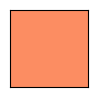

In [67]:
import matplotlib.pyplot as plt

# 给定的RGB值

plt.figure(figsize=(1, 1))  # 设置图形大小为1x1英寸
plt.xticks([])
plt.yticks([])
plt.imshow([[rgb]], aspect='auto')  # 绘制颜色块
plt.show()

**开始可视化**

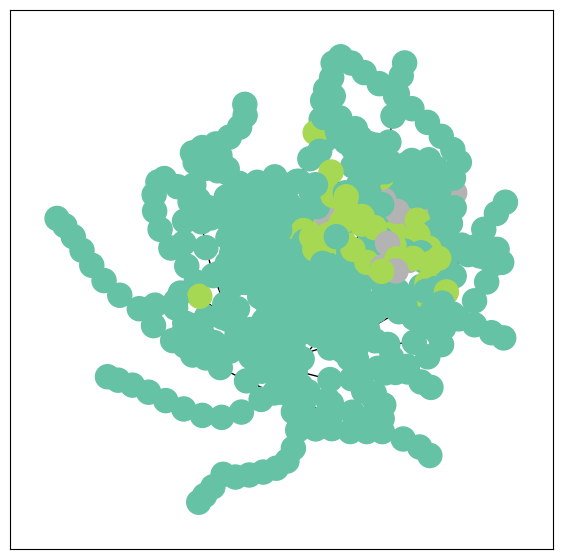

In [208]:
#这步是必要的，请观察是否有独立的节点。没有就是正常。
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

# 构建图神经网络

In [209]:
len(attribute_3)#这是输入端的参数，扬州版本的代码相比福州的进步是：不再需要手动修改

574

In [210]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
#记得修改输入端的参数，必须保持一致

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(123)
        self.conv1 = GCNConv(len(attribute_3), 128)
        self.conv2 = GCNConv(128, 8)
        self.conv3 = GCNConv(8, 6)
        self.classifier = Linear(6, 6)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(574, 128)
  (conv2): GCNConv(128, 8)
  (conv3): GCNConv(8, 6)
  (classifier): Linear(in_features=6, out_features=6, bias=True)
)


**观察嵌入**

Embedding shape: [574, 6]


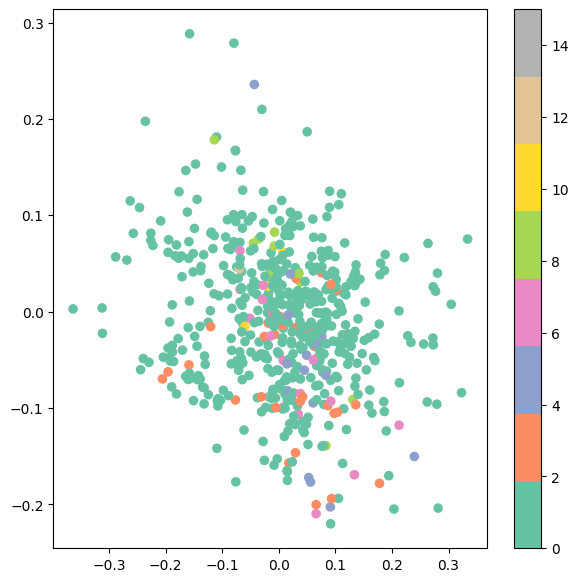

In [211]:
model = GCN()

_, h = model(data.x.float(), data.edge_index)

print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.z)  # #data.y  data.z   如果不想要彩色，就用data.y

In [212]:
#再次检查数据结构
print(data.y[data.train_mask])
print(data.train_mask.shape)


tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

**开始训练模型**

In [213]:
import time
from IPython.display import Javascript  # Restrict height of output cell.

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x.float(), data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask].long())  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h
loss_remember=[]
for epoch in range(401):
    loss, h = train(data)
    loss_remember.append(loss)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

Output hidden; open in https://colab.research.google.com to view.

Text(0, 0.5, 'Loss')

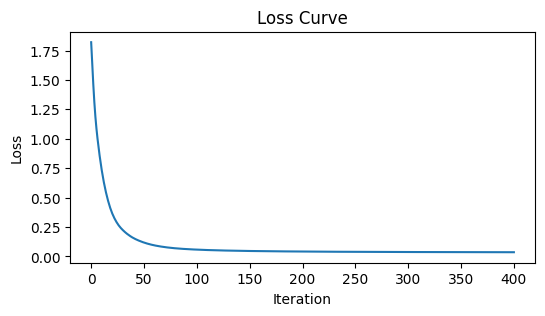

In [214]:
#查看损失函数,这段代码在徐州时进行修改，确保能多次运行而不会出错。
loss_remember_2=loss_remember

import matplotlib.pyplot as plt
import numpy as np

losses = [loss.detach().numpy() if isinstance(loss, torch.Tensor) else loss for loss in loss_remember_2]

plt.figure(figsize=(6, 3))
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")


In [215]:
print(h)
print(h.shape)

tensor([[-0.9964,  0.9999, -0.9974,  0.9981,  0.9989,  0.9991],
        [-0.9971,  0.9999, -0.9979,  0.9985,  0.9991,  0.9993],
        [-0.9977,  0.9999, -0.9984,  0.9988,  0.9993,  0.9995],
        ...,
        [ 0.9918, -0.9996,  0.9880, -0.9946, -0.9964, -0.9981],
        [ 0.9946, -0.9851,  0.9815, -0.9866, -0.9433, -0.9973],
        [ 0.9619,  0.9967,  0.9769, -0.9326,  0.9830, -0.9906]],
       grad_fn=<TanhBackward0>)
torch.Size([574, 6])


# 使用一些手段获取核心区的位置信息

In [216]:
#节点和数字间的映射关系(翻转)

print(reversed_dict)

{'亚联公交停车场': '0', '亚联批发市场': '1', '汤汪医院': '2', '汤汪花园': '3', '连运小区南': '4', '连运路渡江南路': '5', '渡江南路连运西路': '6', '连运小区西门': '7', '奥邦公园': '8', '七里河公园': '9', '渡江南路江阳东路': '10', '福运门': '11', '渡江桥': '12', '育才小学': '13', '苏北医院': '14', '仙鹤寺': '15', '石塔寺': '16', '大学北路北': '17', '双桥': '18', '石桥': '19', '扬州友好医院': '20', '锦绣花园': '21', '紫薇苑': '22', '雍华府': '23', '来鹤台广场': '24', '百祥路': '25', '市人防': '26', '爱尔新视力眼科医院': '27', '扬州职大': '28', '翠岗路西': '29', '市委党校北门': '30', '市委党校': '31', '文化艺术中心': '32', '体育公园': '33', '文昌西路站南路东': '34', '西部客运枢纽(扬州火车站西)': '35', '扬州火车站': '36', '京华城南门': '37', '五彩世界南': '38', '市公安局': '39', '润扬中路文汇西路': '40', '红星美凯龙东': '41', '江阳西路邗江中路': '42', '恒安标准人寿': '43', '江阳中路大学南路': '44', '工人新村': '45', '东花园': '46', '武警医院': '47', '运河北路文昌中路': '48', '文昌花园公交首末站': '49', '东部客运枢纽': '50', '天顺花园北门': '51', '工人疗养院': '52', '运河水庭': '53', '盐亭子小区': '54', '恒大帝景': '55', '新城吾悦广场': '56', '瘦西湖景苑西门': '57', '三星花园西门': '58', '江都北路北': '59', '江平东路江都北路': '60', '江平东路黄金坝路': '61', '佳家如意园': '62', '江平东路瘦西湖路': '63', '雷塘': '64', '江平东路平山路': '

In [217]:
print(h)

tensor([[-0.9964,  0.9999, -0.9974,  0.9981,  0.9989,  0.9991],
        [-0.9971,  0.9999, -0.9979,  0.9985,  0.9991,  0.9993],
        [-0.9977,  0.9999, -0.9984,  0.9988,  0.9993,  0.9995],
        ...,
        [ 0.9918, -0.9996,  0.9880, -0.9946, -0.9964, -0.9981],
        [ 0.9946, -0.9851,  0.9815, -0.9866, -0.9433, -0.9973],
        [ 0.9619,  0.9967,  0.9769, -0.9326,  0.9830, -0.9906]],
       grad_fn=<TanhBackward0>)


In [218]:
h[0][2]

tensor(-0.9974, grad_fn=<SelectBackward0>)

In [219]:
H=[]
for  i in range(len(attribute_3)):
  if h[i][2]>0 and h[i][0]>=0 :#and h[i][1]>=-1
    H.append(i)
  else:
     pass

H=np.array(H)

In [220]:
H

array([ 12,  13,  14,  15,  92,  93,  98, 120, 121, 123, 124, 125, 126,
       150, 151, 152, 153, 158, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 202, 203, 204, 210, 211, 273, 274, 275, 276, 277, 280, 281,
       356, 357, 358, 371, 372, 373, 391, 392, 393, 452, 453, 454, 457,
       488, 520, 524, 545, 546, 547, 548, 549, 550, 551, 555, 561, 562,
       563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573])

In [221]:
H.shape

(76,)

In [222]:
new_list = []
for key in H:
  new_list.append(mapping_dict[str(key)])

In [223]:
new_list

['渡江桥',
 '育才小学',
 '苏北医院',
 '仙鹤寺',
 '二十四桥',
 '瘦西湖西门',
 '荷花池公园',
 '漕河桥',
 '凤凰桥',
 '迎宾馆',
 '瘦西湖',
 '文昌阁',
 '七二三所',
 '康山文化园',
 '跃进桥南',
 '跃进桥',
 '吴道台府',
 '大王庙',
 '工艺美术馆',
 '个园',
 '妇幼保健院',
 '东关街(彩衣街)',
 '东圈门',
 '教场',
 '绿杨旅社',
 '苏唱街',
 '渡江桥北',
 '何园',
 '徐凝门大街(皮市街南)',
 '广陵医院',
 '苏北医院西门',
 '双虹桥',
 '大明寺',
 '观音山',
 '瘦西湖东门',
 '五亭桥',
 '宋夹城体育场休闲公园南门',
 '扬州大学',
 '砚池小区',
 '珍园',
 '琼花观',
 '解放桥',
 '苏北医院西北门',
 '长城饭店',
 '跃进桥东',
 '四望亭',
 '四望亭淮海路西',
 '扬大师院南门',
 '下马桥',
 '汉广陵王墓',
 '瘦西湖悦园',
 '邗沟路黄金坝路',
 '史公祠',
 '梅岭小学',
 '竹西公园(御龙湾商业广场南)',
 '通扬桥(古运河)',
 '南门码头',
 '渡江桥(古运河)',
 '徐凝门桥(古运河)',
 '大水湾公园',
 '跃进桥(古运河)',
 '解放桥(古运河)',
 '荷花池水系',
 '二道河(四望亭路)',
 '二道河(文昌中路)',
 '双虹桥(二道河)',
 '工艺美术馆(桥)(护城河)',
 '联合桥(护城河)',
 '玉器桥(护城河)',
 '史公桥(护城河)',
 '小秦淮河与护城河交界',
 '大东门桥(小秦淮河)',
 '珍园(小秦淮河)',
 '朱氏园(小秦淮河)',
 '钞关(小秦淮河)',
 '新北门桥(护城河)']

**寻找new_list之间的链接关系(获取节点的邻居)**

In [224]:
# 读取CSV文件
df_links = df
df_attributes = df_2

# 创建一个空的多重图
G_new = nx.MultiGraph()

# 添加节点和边到多重图
for _, row in df_links.iterrows():
    node1 = row['前一节点']
    node2 = row['后一节点']
    edge_attr = row['线路名称']
    if pd.notna(node1) and pd.notna(node2):
        G_new.add_edge(node1, node2, attribute=edge_attr)


# 添加节点属性到多重图
for _, row in df_attributes.iterrows():
    node = row['节点名称']
    #attr1 = row['区域属性']
    attr2 = row['线路']
    attr3 = row['500M内文保单位/古迹遗址/宗祠故地的个数']
    #attr4 = row['300M内文保单位/古迹遗址/宗祠故地的个数']
    #attr5 = row['800M内文保单位/古迹遗址/宗祠故地的个数']

    if pd.notna(node):
        G_new.add_node(node)
        #G_new.nodes[node]['区域属性'] = attr1
        G_new.nodes[node]['线路'] = attr2
        G_new.nodes[node]['500M内文保单位/古迹遗址/宗祠故地的个数'] = attr3

        #G_new.nodes[node]['300M内文保单位/古迹遗址/宗祠故地的个数'] = attr4

        #G_new.nodes[node]['800M内文保单位/古迹遗址/宗祠故地的个数'] = attr5


In [225]:
result = []
for m in new_list:
    neighbors = G_new.neighbors(m) # 获得节点m的所有邻居
    common_neighbors = [n for n in neighbors if n in new_list] # 保留那些在new_list中的邻居
    result.append([m + ":" + ", ".join(common_neighbors)])

result

[['渡江桥:育才小学, 七二三所, 渡江桥(古运河), 钞关(小秦淮河)'],
 ['育才小学:渡江桥, 苏北医院'],
 ['苏北医院:育才小学, 仙鹤寺, 荷花池公园, 苏北医院西北门, 苏北医院西门'],
 ['仙鹤寺:苏北医院, 文昌阁, 珍园'],
 ['二十四桥:瘦西湖西门'],
 ['瘦西湖西门:二十四桥'],
 ['荷花池公园:苏北医院, 苏北医院西门, 通扬桥(古运河)'],
 ['漕河桥:凤凰桥'],
 ['凤凰桥:漕河桥'],
 ['迎宾馆:瘦西湖'],
 ['瘦西湖:迎宾馆, 文昌阁, 小秦淮河与护城河交界'],
 ['文昌阁:瘦西湖, 仙鹤寺, 史公祠'],
 ['七二三所:渡江桥, 康山文化园, 何园, 徐凝门桥(古运河)'],
 ['康山文化园:七二三所, 跃进桥南, 长城饭店, 徐凝门桥(古运河)'],
 ['跃进桥南:康山文化园, 跃进桥'],
 ['跃进桥:跃进桥南, 吴道台府, 广陵医院, 跃进桥东'],
 ['吴道台府:跃进桥, 琼花观, 解放桥(古运河)'],
 ['大王庙:邗沟路黄金坝路, 竹西公园(御龙湾商业广场南)'],
 ['工艺美术馆:个园'],
 ['个园:工艺美术馆, 妇幼保健院, 史公祠'],
 ['妇幼保健院:个园, 东关街(彩衣街)'],
 ['东关街(彩衣街):妇幼保健院, 东圈门'],
 ['东圈门:东关街(彩衣街), 教场'],
 ['教场:东圈门, 绿杨旅社'],
 ['绿杨旅社:教场, 苏唱街'],
 ['苏唱街:绿杨旅社, 渡江桥北'],
 ['渡江桥北:苏唱街'],
 ['何园:七二三所, 徐凝门大街(皮市街南)'],
 ['徐凝门大街(皮市街南):何园, 广陵医院'],
 ['广陵医院:徐凝门大街(皮市街南), 跃进桥'],
 ['苏北医院西门:荷花池公园, 双虹桥, 苏北医院'],
 ['双虹桥:苏北医院西门, 苏北医院西北门, 扬州大学, 双虹桥(二道河)'],
 ['大明寺:观音山'],
 ['观音山:大明寺, 瘦西湖东门, 下马桥'],
 ['瘦西湖东门:观音山, 五亭桥'],
 ['五亭桥:瘦西湖东门, 宋夹城体育场休闲公园南门'],
 ['宋夹城体育场休闲公园南门:五亭桥'],
 ['扬州大学:砚池小区, 双虹桥'],
 ['砚池小区:扬州大学'],
 ['珍园:琼花观, 仙

**查询方式**

In [226]:
target = "扬州大学"

matching_sublists = [sublist for sublist in result if target in sublist[0]]

matching_sublists

[['双虹桥:苏北医院西门, 苏北医院西北门, 扬州大学, 双虹桥(二道河)'], ['扬州大学:砚池小区, 双虹桥'], ['砚池小区:扬州大学']]

# 三维可视化

In [227]:
h.shape

torch.Size([574, 6])

In [228]:
B=data.y
B.shape

torch.Size([574])

In [229]:
# 将NumPy数组转换为Python列表
h_1= h.tolist()
B_1=B.tolist()

In [230]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

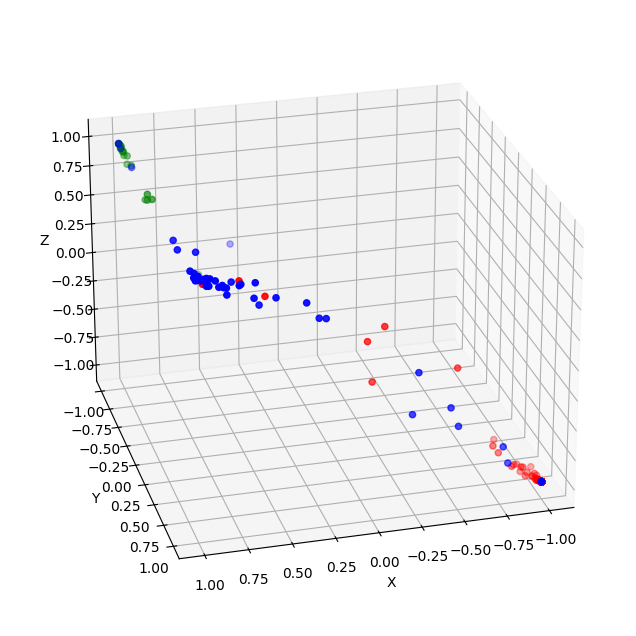

In [231]:
# 提取h的坐标数据
x = [row[0] for row in h_1]
y = [row[4] for row in h_1]
z = [row[2] for row in h_1]

# 创建三维图形对象
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，并根据列表B的值设置不同的颜色
colors = ['red', 'blue', 'green']
label_set = set(B_1)  # 获取唯一的标签值
for label in label_set:
    indices = [i for i, value in enumerate(B_1) if value == label]
    ax.scatter([x[i] for i in indices], [y[i] for i in indices], [z[i] for i in indices], c=colors[label], marker='o')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# 设置初始视角  elev表示俯仰角  azim表示方位角
ax.view_init(elev=25, azim=75)

# 显示图形
plt.show()